In [54]:
from harmony import BBox, Client, Collection, Request, LinkType
from harmony.config import Environment
import requests
from pprint import pprint
import datetime as dt
import s3fs
import xarray as xr
import numpy as np


In [2]:
url = 'https://cmr.earthdata.nasa.gov/search'

In [3]:
collection_url = f'{url}/{"collections"}'

In [4]:
short_name= 'ASCATA-L2-Coastal'
concept_id = 'C1996881752-POCLOUD'

#short_name= 'JASON_CS_S6A_L2_ALT_LR_STD_OST_NRT_F'
#concept_id = 'C1968979597-POCLOUD'

In [5]:
response = requests.get(collection_url, 
                        params={
                            'concept_id': concept_id,
                            },
                        headers={
                            'Accept': 'application/json'
                            }
                       )
response = response.json()

In [6]:
pprint(response)

{'feed': {'entry': [{'archive_center': 'NASA/JPL/PODAAC',
                     'associations': {'services': ['S2004184019-POCLOUD'],
                                      'tools': ['TL2108419875-POCLOUD'],
                                      'variables': ['V2061946455-POCLOUD',
                                                    'V2061955585-POCLOUD',
                                                    'V2061955486-POCLOUD',
                                                    'V2112017004-POCLOUD',
                                                    'V2061955572-POCLOUD',
                                                    'V2061955549-POCLOUD',
                                                    'V2112017007-POCLOUD',
                                                    'V2112017010-POCLOUD',
                                                    'V2061955456-POCLOUD',
                                                    'V2061955603-POCLOUD',
                                            

In [7]:
services = response['feed']['entry'][0]['associations']['services']
print(services)

['S2004184019-POCLOUD']


In [8]:
service_url = "https://cmr.earthdata.nasa.gov/search/services"

In [9]:
service_response = requests.get(service_url, 
                        params={
                            'concept_id': services[0],
                            },
                        headers={
                            'Accept': 'application/vnd.nasa.cmr.umm_results+json'
                            }
                       )
service_response = service_response.json()

In [10]:
pprint(service_response)

{'hits': 1,
 'items': [{'meta': {'concept-id': 'S2004184019-POCLOUD',
                     'concept-type': 'service',
                     'deleted': False,
                     'format': 'application/vnd.nasa.cmr.umm+json',
                     'native-id': 'mmt_service_14199',
                     'provider-id': 'POCLOUD',
                     'revision-date': '2021-10-13T01:56:55.795Z',
                     'revision-id': 5,
                     'user-id': 'mgangl'},
            'umm': {'Description': 'Earthdata OPEnDAP in the cloud',
                    'LongName': 'PO.DAAC OPeNDADP In the Cloud',
                    'MetadataSpecification': {'Name': 'UMM-S',
                                              'URL': 'https://cdn.earthdata.nasa.gov/umm/service/v1.4',
                                              'Version': '1.4'},
                    'Name': 'PO.DAAC Cloud OPeNDAP',
                    'OperationMetadata': [{'DistributedComputingPlatform': ['WEBSERVICES']}],
            

In [11]:
variables = response['feed']['entry'][0]['associations']['variables']


In [12]:
var_url = "https://cmr.earthdata.nasa.gov/search/variables"

In [13]:
var_response = requests.get(var_url, 
                        params={
                            'concept_id': variables[0],
                            },
                        headers={
                            'Accept': 'application/vnd.nasa.cmr.umm_results+json'
                            }
                       )
var_response = var_response.json()

In [31]:
pprint(var_response)

{'hits': 1,
 'items': [{'associations': {'collections': [{'concept-id': 'C1996881752-POCLOUD'}]},
            'meta': {'concept-id': 'V2112017001-POCLOUD',
                     'concept-type': 'variable',
                     'deleted': False,
                     'format': 'application/vnd.nasa.cmr.umm+json',
                     'native-id': 'ASCATA-L2-Coastal-time',
                     'provider-id': 'POCLOUD',
                     'revision-date': '2021-10-19T02:35:27.190Z',
                     'revision-id': 3,
                     'user-id': 'jmcnelis'},
            'umm': {'DataType': 'int',
                    'Definition': 'time',
                    'Dimensions': [{'Name': 'NUMROWS',
                                    'Size': 3251,
                                    'Type': 'OTHER'},
                                   {'Name': 'NUMCELLS',
                                    'Size': 82,
                                    'Type': 'OTHER'}],
                    'FillValues'

In [15]:
var_list = []
for i in range(len(variables)):
    var_response = requests.get(var_url, 
                            params={
                                'concept_id': variables[i],
                                },
                            headers={
                                'Accept': 'application/vnd.nasa.cmr.umm_results+json'
                                }
                           )
    var_response = var_response.json()
    var_list.append(var_response['items'][0]['umm']['Name'])

In [16]:
pprint(var_list)

['wind_speed',
 'ice_prob',
 'wvc_index',
 'lat',
 'ice_age',
 'model_speed',
 'lon',
 'wvc_quality_flag',
 'wind_dir',
 'model_dir',
 'bs_distance',
 'time']


In [17]:
harmony_client = Client()

In [18]:
request = Request(
    collection=Collection(id=short_name),
    spatial=BBox(-97.77667,21.20806,-83.05197,30.16605),
    temporal={
        'start': dt.datetime(2021, 8, 20),
        'stop': dt.datetime(2021, 8, 21),
    },
)

In [19]:
request.is_valid()

True

In [20]:
job_id = harmony_client.submit(request)
job_id

'fe41e002-35d9-436e-8085-4c2037c41064'

In [21]:
harmony_client.status(job_id)

{'status': 'running',
 'message': 'There were 2 collections that matched the provided short name ASCATA-L2-Coastal. See https://cmr.earthdata.nasa.gov/concepts/C1996881752-POCLOUD for details on the selected collection. The version ID for the selected collection is Operational/Near-Real-Time. To use a different collection submit a new request specifying the desired CMR concept ID instead of the collection short name.',
 'progress': 0,
 'created_at': datetime.datetime(2021, 11, 18, 21, 45, 2, 279000, tzinfo=tzlocal()),
 'updated_at': datetime.datetime(2021, 11, 18, 21, 45, 2, 279000, tzinfo=tzlocal()),
 'request': 'https://harmony.earthdata.nasa.gov/ASCATA-L2-Coastal/ogc-api-coverages/1.0.0/collections/all/coverage/rangeset?forceAsync=true&subset=lat(21.20806%3A30.16605)&subset=lon(-97.77667%3A-83.05197)&subset=time(%222021-08-20T00%3A00%3A00%22%3A%222021-08-21T00%3A00%3A00%22)',
 'num_input_granules': 15}

In [22]:
harmony_client.wait_for_processing(job_id, show_progress=True)

 [ Processing: 100% ] |###################################################| [|]


In [32]:
data = harmony_client.result_json(job_id)
pprint(data)


{'createdAt': '2021-11-18T21:45:02.279Z',
 'jobID': 'fe41e002-35d9-436e-8085-4c2037c41064',
 'links': [{'href': 'https://harmony.earthdata.nasa.gov/stac/fe41e002-35d9-436e-8085-4c2037c41064/',
            'rel': 'stac-catalog-json',
            'title': 'STAC catalog',
            'type': 'application/json'},
           {'bbox': [-180, -90, 180, 90],
            'href': 'https://harmony.earthdata.nasa.gov/service-results/harmony-prod-staging/public/podaac/l2-subsetter/fc3ae2e7-2ed0-4a84-b602-81ed92226569/ascat_20210819_224800_metopa_76977_eps_o_coa_3202_ovw.l2.nc4',
            'rel': 'data',
            'temporal': {'end': '2021-08-20T00:26:58.000Z',
                         'start': '2021-08-19T22:48:00.000Z'},
            'title': 'ascat_20210819_224800_metopa_76977_eps_o_coa_3202_ovw.l2.nc4',
            'type': 'application/x-netcdf4'},
           {'bbox': [-180, -90, 180, 90],
            'href': 'https://harmony.earthdata.nasa.gov/service-results/harmony-prod-staging/public/poda

In [33]:
results = harmony_client.result_urls(job_id, link_type=LinkType.s3)
urls = list(results)
pprint(urls)

['s3://harmony-prod-staging/public/podaac/l2-subsetter/fc3ae2e7-2ed0-4a84-b602-81ed92226569/ascat_20210819_224800_metopa_76977_eps_o_coa_3202_ovw.l2.nc4',
 's3://harmony-prod-staging/public/podaac/l2-subsetter/fc3ae2e7-2ed0-4a84-b602-81ed92226569/ascat_20210820_002700_metopa_76978_eps_o_coa_3202_ovw.l2.nc4',
 's3://harmony-prod-staging/public/podaac/l2-subsetter/fc3ae2e7-2ed0-4a84-b602-81ed92226569/ascat_20210820_020900_metopa_76979_eps_o_coa_3202_ovw.l2_subsetted.nc4',
 's3://harmony-prod-staging/public/podaac/l2-subsetter/fc3ae2e7-2ed0-4a84-b602-81ed92226569/ascat_20210820_035100_metopa_76980_eps_o_coa_3202_ovw.l2.nc4',
 's3://harmony-prod-staging/public/podaac/l2-subsetter/fc3ae2e7-2ed0-4a84-b602-81ed92226569/ascat_20210820_053300_metopa_76981_eps_o_coa_3202_ovw.l2.nc4',
 's3://harmony-prod-staging/public/podaac/l2-subsetter/fc3ae2e7-2ed0-4a84-b602-81ed92226569/ascat_20210820_071500_metopa_76982_eps_o_coa_3202_ovw.l2.nc4',
 's3://harmony-prod-staging/public/podaac/l2-subsetter/fc3ae

In [34]:
url = urls[2]
url

's3://harmony-prod-staging/public/podaac/l2-subsetter/fc3ae2e7-2ed0-4a84-b602-81ed92226569/ascat_20210820_020900_metopa_76979_eps_o_coa_3202_ovw.l2_subsetted.nc4'

In [35]:
creds = harmony_client.aws_credentials()

In [36]:
s3_fs = s3fs.S3FileSystem(
    key=creds['aws_access_key_id'],
    secret=creds['aws_secret_access_key'],
    token=creds['aws_session_token'],
    client_kwargs={'region_name':'us-west-2'},
)

In [37]:
f = s3_fs.open(url, mode='rb')
ds = xr.open_dataset(f)
ds

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'time' has multiple fill values {1.0000000150474662e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'lat' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'lon' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'wvc_index' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:512: Serializ

<xarray.Dataset>
Dimensions:           (NUMROWS: 89, NUMCELLS: 41)
Coordinates:
    lat               (NUMROWS, NUMCELLS) float32 ...
    lon               (NUMROWS, NUMCELLS) float32 ...
Dimensions without coordinates: NUMROWS, NUMCELLS
Data variables:
    time              (NUMROWS, NUMCELLS) datetime64[ns] ...
    wvc_index         (NUMROWS, NUMCELLS) float32 ...
    model_speed       (NUMROWS, NUMCELLS) float32 ...
    model_dir         (NUMROWS, NUMCELLS) float32 ...
    ice_prob          (NUMROWS, NUMCELLS) float32 ...
    ice_age           (NUMROWS, NUMCELLS) float32 ...
    wvc_quality_flag  (NUMROWS, NUMCELLS) float64 ...
    wind_speed        (NUMROWS, NUMCELLS) float32 ...
    wind_dir          (NUMROWS, NUMCELLS) float32 ...
    bs_distance       (NUMROWS, NUMCELLS) float32 ...
Attributes: (12/30)
    title:                            MetOp-A ASCAT Level 2 Coastal Ocean Sur...
    title_short_name:                 ASCATA-L2-Coastal
    Conventions:                      CF-1.6
    institution:                      EUMETSAT/OSI SAF/KNMI
    source:                           MetOp-A ASCAT
    software_identification_level_1:  [1000]
    ...                               ...
    history:                          N/A\n2021-11-18 21:45:17.967089 l2ss-py...
    references:                       ASCAT Wind Product User Manual, http://...
    comment:                          Orbit period and inclination are consta...
    creation_date:                    2021-08-20
    creation_time:                    04:56:16
    history_json:                     [{"date_time": "2021-11-18T21:45:17.967...

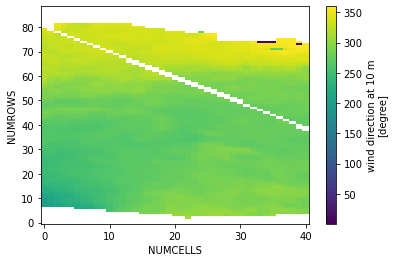

In [44]:
ds.wind_dir.plot() ;